In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

#load cifer10 data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=2,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


0it [00:00, ?it/s]

100%|█████████▉| 169926656/170498071 [01:00<00:00, 3239163.74it/s]

Files already downloaded and verified


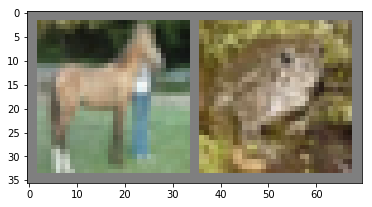

horse  frog


In [2]:
#show some of the training images, for fun.

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(2)))



In [0]:
#Define a Convolutional Neural Network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
#Define a Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

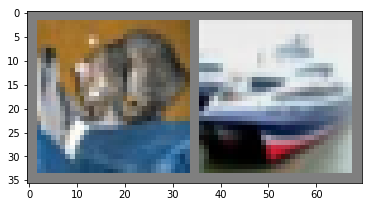

GroundTruth:    cat  ship


In [5]:
#Test the network on the test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [14]:
#Train the network
iteration=[]
stat_running_loss=[]
count=0
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            iteration.append(count)
            stat_running_loss.append(running_loss/2000)    
            running_loss = 0.0
    count+=1

print('Finished Training')

[1,  2000] loss: 1.216
[1,  4000] loss: 1.214
[1,  6000] loss: 1.196
[1,  8000] loss: 1.235
[1, 10000] loss: 1.242
[1, 12000] loss: 1.222
[1, 14000] loss: 1.210
[1, 16000] loss: 1.263
[1, 18000] loss: 1.210
[1, 20000] loss: 1.252
[1, 22000] loss: 1.215
[1, 24000] loss: 1.189
Finished Training


In [15]:
print(iteration)
print(stat_running_loss)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1.2161259606182575, 1.21436239528656, 1.1962771115899087, 1.2349985918998718, 1.2416753753721714, 1.221830325871706, 1.2100975151062012, 1.2634435016810894, 1.2095003757476808, 1.2517779527306556, 1.2146495729982854, 1.188784869492054]


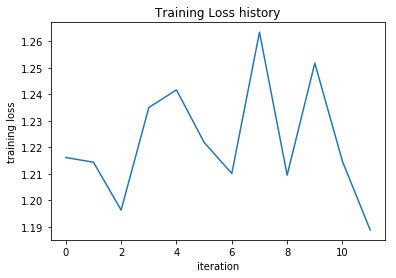

<Figure size 432x288 with 0 Axes>

In [17]:
iteration=[]
iteration=[0,1,2,3,4,5,6,7,8,9,10,11]
# plot the loss history
plt.plot(iteration,stat_running_loss)
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()
plt.savefig('Trainning Loss History')

In [18]:
#Check the CNN prediction
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

Predicted:   frog  frog


In [19]:
#how the network performs on the whole dataset.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [13]:
#the classes that performed well, and the classes that did not perform well
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 76 %
Accuracy of   car : 72 %
Accuracy of  bird : 28 %
Accuracy of   cat : 37 %
Accuracy of  deer : 54 %
Accuracy of   dog : 35 %
Accuracy of  frog : 74 %
Accuracy of horse : 62 %
Accuracy of  ship : 49 %
Accuracy of truck : 41 %


In [0]:
#Check if cuda is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
